In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Merging 12 months of sales data into a single file

In [10]:
path = "./data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data.csv", index=False)

In [12]:
df = pd.read_csv("all_data.csv")
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11392,306532,AA Batteries (4-pack),1,3.84,12/15/19 21:17,"112 Adams St, Los Angeles, CA 90001"
150752,251590,20in Monitor,1,109.99,09/15/19 05:52,"816 Jackson St, Los Angeles, CA 90001"
29303,180567,Wired Headphones,1,11.99,04/10/19 21:22,"414 Cedar St, Los Angeles, CA 90001"
100920,280245,USB-C Charging Cable,2,11.95,11/20/19 05:52,"376 11th St, San Francisco, CA 94016"
73044,238861,Bose SoundSport Headphones,1,99.99,08/21/19 16:21,"866 Meadow St, San Francisco, CA 94016"


Drop rows of NAN

In [13]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.dropna(how='all')
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
139868,143530,USB-C Charging Cable,1,11.95,01/17/19 14:01,"45 5th St, Los Angeles, CA 90001"
3899,299372,AA Batteries (4-pack),1,3.84,12/13/19 10:25,"195 1st St, Dallas, TX 75001"
51183,157823,Apple Airpods Headphones,1,150,02/26/19 13:46,"727 Main St, New York City, NY 10001"
22705,317352,Macbook Pro Laptop,1,1700,12/10/19 21:44,"731 Church St, San Francisco, CA 94016"
161650,225588,Apple Airpods Headphones,1,150,07/24/19 23:34,"431 Meadow St, Los Angeles, CA 90001"


Get rid of text in order date column

In [17]:
df = df[df['Order Date'].str[0:2]!='Or']

Make columns correct type

In [18]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

Augment data with additional columns

Add month column

In [19]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = pd.to_numeric(df['Month'])
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
82424,247823,AAA Batteries (4-pack),1,2.99,08/22/19 20:00,"456 13th St, Seattle, WA 98101",8
47877,154674,Wired Headphones,1,11.99,02/11/19 15:31,"880 Church St, New York City, NY 10001",2
94563,205303,Apple Airpods Headphones,1,150.00,05/14/19 13:51,"394 Jackson St, San Francisco, CA 94016",5
160344,224344,Flatscreen TV,1,300.00,07/22/19 21:43,"925 10th St, Dallas, TX 75001",7
68512,174402,Lightning Charging Cable,1,14.95,03/23/19 06:31,"365 13th St, New York City, NY 10001",3


Add city column

In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,"Atlanta, GA"


What was the best month for sales? How much was earned that month?

In [27]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,"New York City, NY",1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,"New York City, NY",600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,"New York City, NY",11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,"San Francisco, CA",149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,"Atlanta, GA",11.95


In [26]:
df.groupby(['Month']).sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

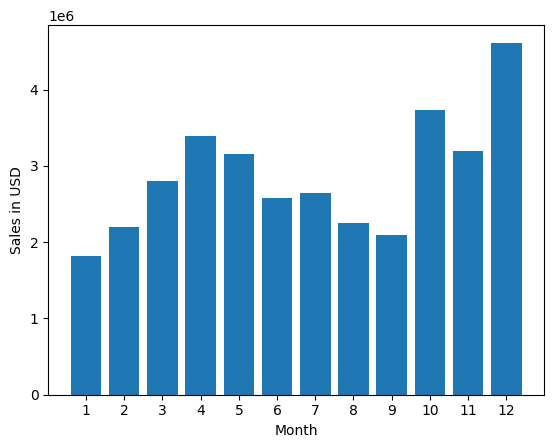

In [28]:
months = range(1, 13)

plt.bar(months, df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

What city sold the most product?

In [29]:
df.groupby(['City']).sum()['Sales']

City
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Sales, dtype: float64

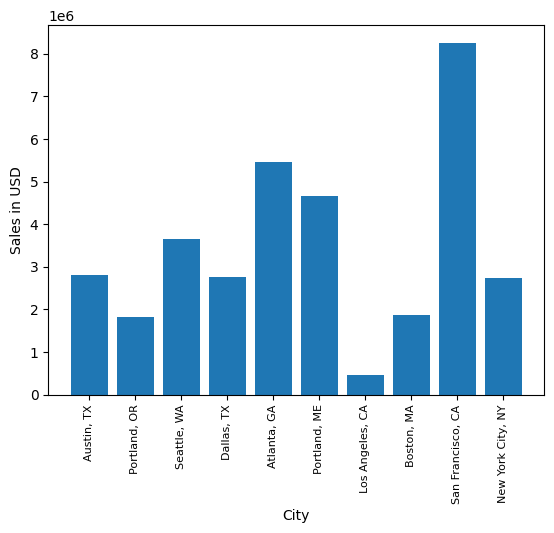

In [32]:
city = list(set(df['City']))
plt.bar(city, df.groupby(['City']).sum()['Sales'])
plt.xticks(city, rotation='vertical', size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

What time should we display advertisements to maximize likelihood of customer's buying product?

In [37]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y/%m/%d %H:%M:%S')
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,"New York City, NY",1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,"New York City, NY",600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,"New York City, NY",11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,"San Francisco, CA",149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,"Atlanta, GA",11.95,12,38,1


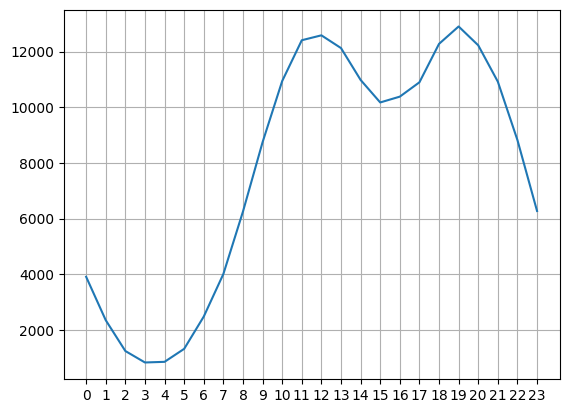

In [40]:
hours = list(set(df['Hour']))
plt.plot(hours, df.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()

What product sold the most?

In [45]:
df.drop(columns=['Order Date'], inplace=True)


In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,"New York City, NY",1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,"New York City, NY",600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,"New York City, NY",11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,"San Francisco, CA",149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,"Atlanta, GA",11.95,12,38,1


In [54]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

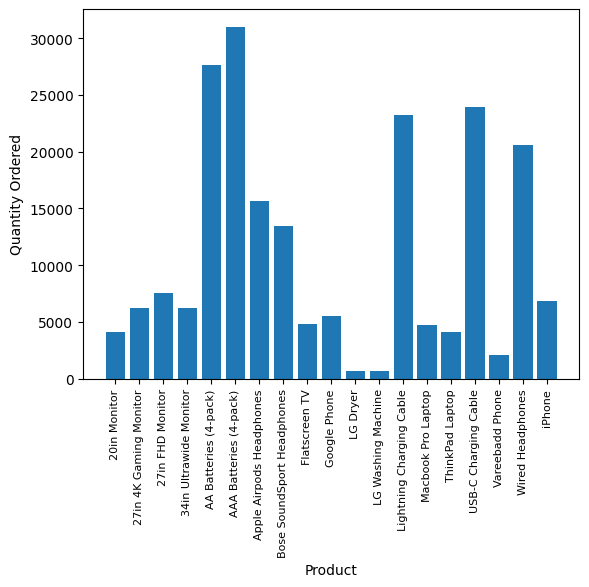

In [58]:
products = [product for product, group in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()